Mounted at /content/drive

Evaluasi Model:
Akurasi: 97.73%
Precision: 97.60%
Recall: 97.71%

Confusion Matrix:
[[912  21]
 [ 20 855]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       933
           1       0.98      0.98      0.98       875

    accuracy                           0.98      1808
   macro avg       0.98      0.98      0.98      1808
weighted avg       0.98      0.98      0.98      1808



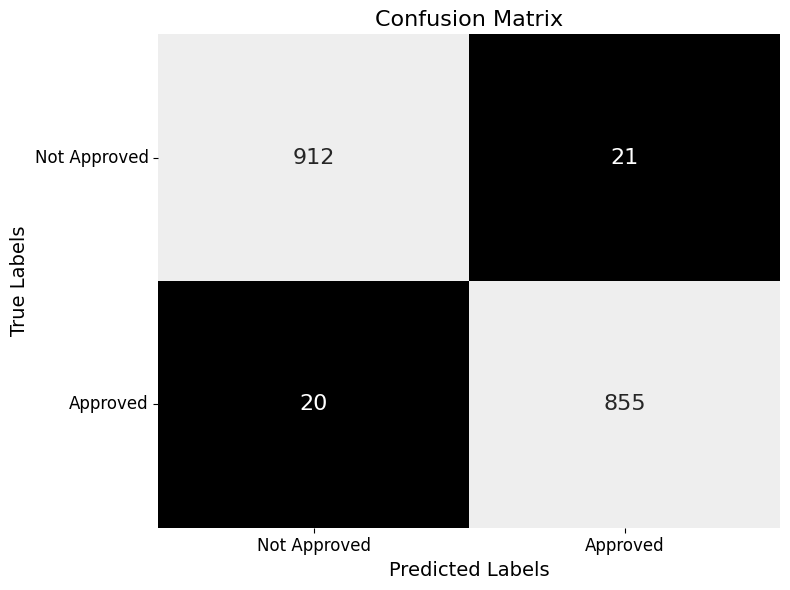

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import joblib
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Memuat dataset
df_path = '/content/drive/MyDrive/Bank_Personal_Loan_Modelling.csv'
data = pd.read_csv(df_path)

# Pisahkan fitur dan label
X = data.drop(columns=['Personal Loan'])
y = data['Personal Loan']

# Normalisasi data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Mengatasi ketidakseimbangan kelas dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Membagi data menjadi pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Membuat model SVM dengan kernel RBF
svm_model = SVC(kernel='rbf', random_state=42, class_weight='balanced')

# Melatih model SVM dengan data pelatihan
svm_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = svm_model.predict(X_test)

# Evaluasi model dengan menghitung akurasi, precision, dan recall
accuracy = accuracy_score(y_test, y_pred) * 100  # Mengkonversi ke persen
precision = precision_score(y_test, y_pred) * 100  # Mengkonversi ke persen
recall = recall_score(y_test, y_pred) * 100  # Mengkonversi ke persen

# Menampilkan hasil evaluasi dalam persen dengan 2 angka di belakang koma
print("\nEvaluasi Model:")
print(f"Akurasi: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")

# Menampilkan confusion matrix dan classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix berdasarkan hasil SVM
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix dengan empat warna abu-abu
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=sns.color_palette(["#000000", "#555555", "#AAAAAA", "#EEEEEE"]),
            cbar=False,
            annot_kws={"size": 16},  # Ukuran font dalam matriks diperbesar
            xticklabels=['Not Approved', 'Approved'],
            yticklabels=['Not Approved', 'Approved'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()
